# **Analise dos dados da planilha de clientes da melhores compras**

In [1]:
# Bibliotecas que podem ser util para analise dos dados do data frame:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Subindo para o Python a planilha de clientes para a analise
# O nome da variavel será Planilha_mc (planilha melhores compras)
# Utilizado pd que é referente a biblioteca Pandas.

planilha_mc = pd.read_excel('/content/Cap 01 Asset_PBL_Perfil_Clientes_Top_ECommerce.xlsx')

In [3]:
# Realizando através do comando (head) a leitura dos dados da planilha
# Filtrado somente os 10 primeiros dados.

planilha_mc.head(10)

,Região País,Estado,Data,FormaPagto,Sexo Informado Cliente,Idade,valor ticket médio,numero pedido
0,Nordeste,Piauí,2023-11-17,Cartão Crédito,F,22,102,37380646
1,Sudeste,São Paulo,2023-10-13,Boleto Bancário,M,21,32,35870530
2,Sudeste,Minas Gerais,2023-12-24,Dinheiro,M,22,101,38158515
3,Sudeste,Espírito Santo,2023-12-19,Dinheiro,F,20,70,36341482
4,Sul,Paraná,2023-12-05,Cartão Débito,M,21,67,38416338
5,Sul,Rio Grande do Sul,2023-09-01,Boleto Bancário,F,22,108,38022271
6,Norte,Acre,2023-12-31,Dinheiro,F,22,49,36263144
7,Norte,Amapá,2023-11-05,Pix,M,21,56,37511576
8,Norte,Pará,2023-11-04,Cartão Crédito,F,22,105,36265605
9,Norte,Rondônia,2023-11-05,Cartão Débito,F,21,93,38213309


**Iniciando as analises dos dados conforme as necessidades de negocio**

In [4]:
# Conhecendo os dados, iniciaremos com a contagem de linhas que temos nessa planilha:

Qtd_linhas = planilha_mc.shape[0]
print(f'A planilha contem : {Qtd_linhas} de linhas')

# São 47835 registros de clientes.

A planilha contem : 47835 de linhas


# **Existe valores Missing?**

In [5]:
# Os valores "Missing", são valores que o conjunto de dados estão sem preencher.

valores_nulos = planilha_mc.isnull().sum()
print(valores_nulos)

#Após a execução do codigo, a principio não temos valores ausentes.

Região País               0
Estado                    0
Data                      0
FormaPagto                0
Sexo Informado Cliente    0
Idade                     0
valor ticket médio        0
numero pedido             0
dtype: int64


# **Realizando analise mais profunda dentro do planilha**

In [6]:
# Realizando a analise dos dados da planilha para saber se existe outliers
# Usarei os quantis 0.25 (primeiro quartil, Q1) e 0.75 (terceiro quartil, Q3) é para calcular o intervalo interquartil (IQR)
# É uma abordagem comum para a identificação de outliers em uma distribuição de dados

Q1 = planilha_mc['Idade'].quantile(0.25)
Q3 = planilha_mc['Idade'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_idade = planilha_mc[(planilha_mc['Idade'] < limite_inferior) | (planilha_mc['Idade'] > limite_superior)]

print(f"Número de outliers na coluna 'Idade': {outliers_idade.shape[0]}")


Número de outliers na coluna 'Idade': 12


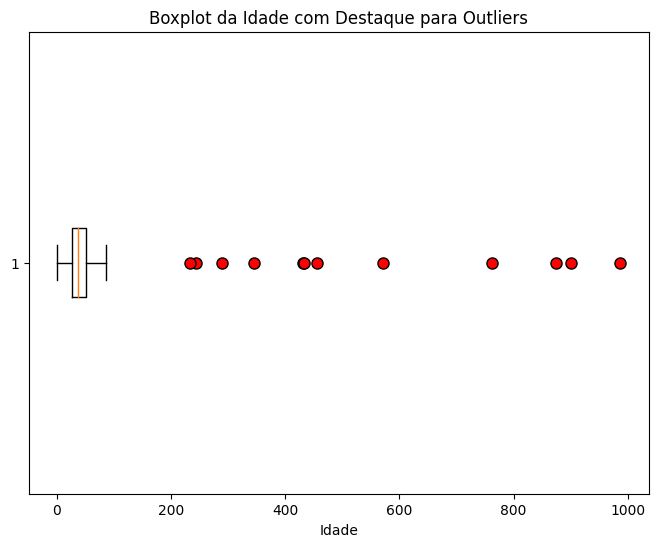

In [7]:
# Criando o boxplot com destaque para outliers
# Dessa forma fica mais nitido os valores extremos e justificando de forma visual a presença de valores que podemos classificar como outliers

plt.figure(figsize=(8, 6))
plt.boxplot(planilha_mc['Idade'], vert=False, flierprops=dict(marker='o', markersize=8, markerfacecolor='red', markeredgecolor='black'))
plt.title("Boxplot da Idade com Destaque para Outliers")
plt.xlabel("Idade")
plt.show()

Acima podemos identificar em pontos vermelhos os valores outliers

Dentro do grafico boxplot temos as idades e a linha em vermelho seria as idades medias.

Identifica o intervalo medio entre a idade minima e maxima e a idade média.

In [8]:
# A identificação dos outliers é uma estimativa, podendo ter e mesmo assim, podemos ter clientes com idades avançadas.
# as idades avançadas não necessariamente representa um valor de outliers, já que podemos ter clientes acima da idade
# pensando na idade média que as pessoas podem viver, podemos realizar essa consulta, só para constar que estão dentro dos parametro:
# Filtragem de idades entre 18 e 90 anos

idades_filtradas = planilha_mc[(planilha_mc['Idade'] >= 18) & (planilha_mc['Idade'] <= 90)]

# Exibir as idades filtradas
print("Idades entre 18 e 90 anos:")
print(idades_filtradas)


Idades entre 18 e 90 anos:
      Região País           Estado       Data       FormaPagto  \
0        Nordeste            Piauí 2023-11-17   Cartão Crédito   
1         Sudeste        São Paulo 2023-10-13  Boleto Bancário   
2         Sudeste     Minas Gerais 2023-12-24         Dinheiro   
3         Sudeste   Espírito Santo 2023-12-19         Dinheiro   
4             Sul           Paraná 2023-12-05    Cartão Débito   
...           ...              ...        ...              ...   
47830     Sudeste        São Paulo 2024-02-29              Pix   
47831     Sudeste     Minas Gerais 2024-03-23         Dinheiro   
47832     Sudeste   Rio de Janeiro 2024-01-11    Cartão Débito   
47833     Sudeste   Espírito Santo 2024-01-25    Cartão Débito   
47834         Sul  Santa  Catarina 2024-02-10              Pix   

      Sexo Informado Cliente  Idade  valor ticket médio  numero pedido  
0                          F     22                 102       37380646  
1                          M     2

In [9]:
#consultando as idades maxima e minimas registradas na planilha:

idade_max = planilha_mc['Idade'].max()
idade_min = planilha_mc['Idade'].min()
print(f"A idade máxima é: {idade_max}")
print(f"A idade mínima é: {idade_min}")

A idade máxima é: 987
A idade mínima é: 0


In [10]:
# Filtro das idades entre 18 e 90 anos
idades_filtradas = planilha_mc[(planilha_mc['Idade'] >= 18) & (planilha_mc['Idade'] <= 90)]

# Contar o número de linhas que temos clientes entre essa idade:
qtd_idades_filtradas = idades_filtradas.shape[0]

# Exibir o resultado
print(f"O número de linhas com idades entre 18 e 90 anos é: {qtd_idades_filtradas}")


O número de linhas com idades entre 18 e 90 anos é: 47821


In [11]:
# Filtro das idades que estão FORA do intervalo de 18 a 90 anos
idades_fora_intervalo = planilha_mc[(planilha_mc['Idade'] < 18) | (planilha_mc['Idade'] > 90)]

# Contar o número de linhas
qtd_idades_fora_intervalo = idades_fora_intervalo.shape[0]

# Exibir o resultado
print(f"O número de linhas com idades fora do intervalo de 18 a 90 anos é: {qtd_idades_fora_intervalo}")


O número de linhas com idades fora do intervalo de 18 a 90 anos é: 14


In [12]:
# Excluir as linhas em que a idade é maior que 90 anos
planilha_mc_corrigida = planilha_mc[planilha_mc['Idade'] <= 90]

In [13]:
# Filtro das idades que estão FORA do intervalo de 18 a 90 anos,após a exclusão dos clientes acima dos 90 anos

idades_fora_intervalo = planilha_mc_corrigida.loc[(planilha_mc_corrigida['Idade'] < 1) | (planilha_mc_corrigida['Idade'] > 90)]

# Contar o número de linhas
qtd_idades_fora_intervalo = idades_fora_intervalo.shape[0]

# Exibir o resultado
print(f"O número de linhas com idades fora do intervalo de 18 a 90 anos é: {qtd_idades_fora_intervalo}")

O número de linhas com idades fora do intervalo de 18 a 90 anos é: 2


In [14]:
# Remover linhas com valores faltantes na coluna 'Idade'
planilha_mc_corrigida = planilha_mc_corrigida.dropna(subset=['Idade'])


In [15]:
# Verificar se há valores nulos
nulos = planilha_mc_corrigida['Idade'].isnull().sum()

# Verificar se há valores abaixo de 0
abaixo_de_0 = (planilha_mc_corrigida['Idade'] < 0).sum()

print(f"Valores nulos: {nulos}")
print(f"Valores abaixo de 0: {abaixo_de_0}")

Valores nulos: 0
Valores abaixo de 0: 0


In [16]:
# Verificar se há valores não numéricos
nao_numericos = planilha_mc_corrigida['Idade'].apply(lambda x: not isinstance(x, (int, float))).sum()

print(f"Valores não numéricos: {nao_numericos}")


Valores não numéricos: 0


In [17]:
planilha_mc_corrigida.head(10)

,Região País,Estado,Data,FormaPagto,Sexo Informado Cliente,Idade,valor ticket médio,numero pedido
0,Nordeste,Piauí,2023-11-17,Cartão Crédito,F,22,102,37380646
1,Sudeste,São Paulo,2023-10-13,Boleto Bancário,M,21,32,35870530
2,Sudeste,Minas Gerais,2023-12-24,Dinheiro,M,22,101,38158515
3,Sudeste,Espírito Santo,2023-12-19,Dinheiro,F,20,70,36341482
4,Sul,Paraná,2023-12-05,Cartão Débito,M,21,67,38416338
5,Sul,Rio Grande do Sul,2023-09-01,Boleto Bancário,F,22,108,38022271
6,Norte,Acre,2023-12-31,Dinheiro,F,22,49,36263144
7,Norte,Amapá,2023-11-05,Pix,M,21,56,37511576
8,Norte,Pará,2023-11-04,Cartão Crédito,F,22,105,36265605
9,Norte,Rondônia,2023-11-05,Cartão Débito,F,21,93,38213309


# Resumindo até aqui:


*   Encontrei valores missing? não, já que todos os campos estão preechidos. Porém, não significa que temos dados corretos.
*   Encontrei valores outliers? Sim, pela necessidade passada pela gerencia da melhores compras, foi designado para analisar a coluna idade. Podemos observar que ao realizar a analise estatistica pelo metodo de interquartil, indentificamos o número de 14 outliers.


*   Por isso, realizei a filtragem de idade entre 18 a 90 anos. Para obtermos uma segunda informação das possibilidades e confirmar valores mais reais. Obtivemos 14 dados dentre desse conjunto de dados que estão fora desse intervalo de idade.





# Abaixo, iremos observar se os outliers idade, influenciam de maneira direta no valores do ticket médio

In [18]:
# Excluir as linhas com outliers na coluna 'Idade'
dados_sem_outliers_idade = planilha_mc_corrigida[(planilha_mc_corrigida['Idade'] >= limite_inferior) & (planilha_mc_corrigida['Idade'] <= limite_superior)]

# Exibir o DataFrame resultante
print("Dados sem outliers na coluna 'Idade':")
print(dados_sem_outliers_idade)

# verificar quantas linhas foram removidas
linhas_removidas = planilha_mc_corrigida.shape[0] - dados_sem_outliers_idade.shape[0]
print(f"Número de linhas removidas: {linhas_removidas}")


Dados sem outliers na coluna 'Idade':
      Região País           Estado       Data       FormaPagto  \
0        Nordeste            Piauí 2023-11-17   Cartão Crédito   
1         Sudeste        São Paulo 2023-10-13  Boleto Bancário   
2         Sudeste     Minas Gerais 2023-12-24         Dinheiro   
3         Sudeste   Espírito Santo 2023-12-19         Dinheiro   
4             Sul           Paraná 2023-12-05    Cartão Débito   
...           ...              ...        ...              ...   
47830     Sudeste        São Paulo 2024-02-29              Pix   
47831     Sudeste     Minas Gerais 2024-03-23         Dinheiro   
47832     Sudeste   Rio de Janeiro 2024-01-11    Cartão Débito   
47833     Sudeste   Espírito Santo 2024-01-25    Cartão Débito   
47834         Sul  Santa  Catarina 2024-02-10              Pix   

      Sexo Informado Cliente  Idade  valor ticket médio  numero pedido  
0                          F     22                 102       37380646  
1                      

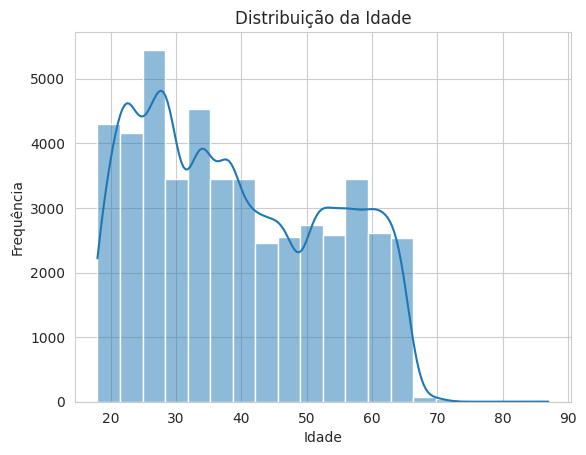

In [46]:
#utilizando o SNS (seaborn) apresentamos a frequencia da idade na planilha

sns.histplot(planilha_mc_corrigida['Idade'], bins=20, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Acima realizei o tratamento de dados referente a coluna 'idade', retirando os valores outliers, assim como foi definido e solicitado pela gerencia da melhores compras.
# Para verificar de forma intuitiva, novamente, utilizo grafico para analisar os resultados da exclusão dos outliers da coluna 'idade'.

In [20]:
# Calculando o ticket médio considerando todos os dados
ticket_medio_total = planilha_mc['valor ticket médio'].mean()

# Excluindo os outliers
# Criando outra variavel para identificar e utilizar para as demais analises (chamada dados_sem_outliers_idade)

dados_sem_outliers_idade = planilha_mc_corrigida[(planilha_mc_corrigida['Idade'] >= limite_inferior) & (planilha_mc_corrigida['Idade'] <= limite_superior)]
ticket_medio_sem_outliers_idade = dados_sem_outliers_idade['valor ticket médio'].mean()

# Exibindo os resultados
print(f"Ticket médio de vendas considerando todos os dados: {ticket_medio_total}")
print(f"Ticket médio de vendas excluindo os outliers de idade: {ticket_medio_sem_outliers_idade}")

# Realizando o teste t
t_stat, p_value = stats.ttest_ind(planilha_mc['valor ticket médio'], dados_sem_outliers_idade['valor ticket médio'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretando o p-value
alpha = 0.05
if p_value < alpha:
    print("A diferença entre as médias é estatisticamente significativa.")
else:
    print("A diferença entre as médias não é estatisticamente significativa.")

Ticket médio de vendas considerando todos os dados: 236.4011288805268
Ticket médio de vendas excluindo os outliers de idade: 236.5264203416766
T-statistic: -0.11657889288434602
P-value: 0.9071940094307267
A diferença entre as médias não é estatisticamente significativa.


# Dando continuidade nas analises - Ticket Médio

In [21]:
# Verificando valores negativos ou zero na coluna da planilha de clientes 'valor ticket médio'
# nomeando a variavel como dados_inco
dados_inconsistentes = planilha_mc_corrigida[planilha_mc_corrigida['valor ticket médio'] <= 0]
print("Dados inconsistentes (valor ticket médio <= 0):")
print(dados_inconsistentes)

Dados inconsistentes (valor ticket médio <= 0):
        Região País             Estado       Data       FormaPagto  \
740           Norte          Tocantins 2023-11-23   Cartão Crédito   
949         Sudeste     Espírito Santo 2023-10-23  Boleto Bancário   
1157       Nordeste         Pernambuco 2023-11-23   Cartão Crédito   
1263          Norte              Amapá 2023-10-10  Boleto Bancário   
1367          Norte           Amazonas 2023-11-21  Boleto Bancário   
1393   Centro Oeste        Mato Grosso 2023-12-04   Cartão Crédito   
1419   Centro Oeste   Distrito Federal 2023-12-29         Dinheiro   
1524       Nordeste              Piauí 2023-12-30              Pix   
1602            Sul  Rio Grande do Sul 2023-11-11   Cartão Crédito   
1705   Centro Oeste   Distrito Federal 2023-12-20  Boleto Bancário   
1809            Sul             Paraná 2023-12-08         Dinheiro   
1939          Norte           Rondônia 2023-10-20  Boleto Bancário   
2069       Nordeste              Bahia 202

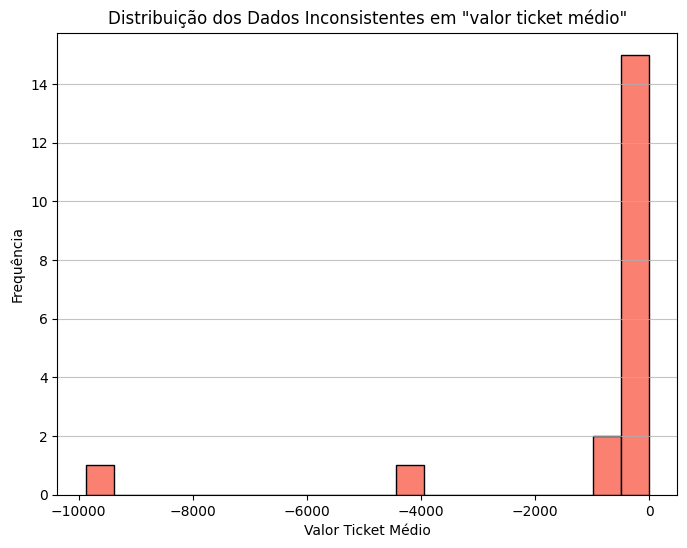

In [22]:
# Histograma dos dados inconsistentes
plt.figure(figsize=(8, 6))
plt.hist(dados_inconsistentes['valor ticket médio'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribuição dos Dados Inconsistentes em "valor ticket médio"')
plt.xlabel('Valor Ticket Médio')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

Acima podemos observar de forma mais clara a frequencia e os dados de ticket médio estão fora da normalidade.
Frizando que é somente de dados igual ou menor que 0.


In [23]:
#consultando as Valor Ticket Médio maxima e minimas registradas na planilha:

ticket_max = planilha_mc['valor ticket médio'].max()
ticket_min = planilha_mc['valor ticket médio'].min()
print(f"A ticket máxima é: {ticket_max}")
print(f"A ticket mínima é: {ticket_min}")

A ticket máxima é: 690
A ticket mínima é: -9876


In [24]:
# Excluindo valores negativos e zero da planilha
# Dando um novo nome a planilha para que os dados novos sejam analisado de forma organizada (planilha_mc_corrigida)

planilha_mc_corrigida = planilha_mc_corrigida[planilha_mc_corrigida['valor ticket médio'] > 0]

# Calcular Q1, Q3 e IQR para 'valor ticket médio'
Q1 = planilha_mc_corrigida['valor ticket médio'].quantile(0.25)
Q3 = planilha_mc_corrigida['valor ticket médio'].quantile(0.75)
IQR = Q3 - Q1

# Definindo limites inferior e superior para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando outliers
outliers_ticket_medio = planilha_mc_corrigida[(planilha_mc_corrigida['valor ticket médio'] < limite_inferior) | (planilha_mc_corrigida['valor ticket médio'] > limite_superior)]
print("Outliers no 'valor ticket médio':")
print(outliers_ticket_medio)

# Excluindo os outliers
dados_sem_outliers_ticket_medio = planilha_mc_corrigida[(planilha_mc_corrigida['valor ticket médio'] >= limite_inferior) & (planilha_mc_corrigida['valor ticket médio'] <= limite_superior)]

# Exibindo o DataFrame resultante
print("Dados corrigidos e prontos para análise:")
print(dados_sem_outliers_ticket_medio)

# verificando quantas linhas foram removidas
linhas_removidas = planilha_mc.shape[0] - dados_sem_outliers_ticket_medio.shape[0]
print(f"Número de linhas removidas: {linhas_removidas}")


Outliers no 'valor ticket médio':
        Região País           Estado       Data       FormaPagto  \
1072          Norte             Acre 2023-11-13         Dinheiro   
1208        Sudeste   Rio de Janeiro 2023-11-26              Pix   
1357        Sudeste   Espírito Santo 2023-11-04   Cartão Crédito   
3225        Sudeste     Minas Gerais 2023-11-22   Cartão Crédito   
4921       Nordeste       Pernambuco 2023-11-08   Cartão Crédito   
5105   Centro Oeste            Goiás 2023-12-12              Pix   
5482          Norte            Amapá 2023-11-10              Pix   
6388        Sudeste     Minas Gerais 2023-11-15         Dinheiro   
7929       Nordeste          Paraíba 2023-10-21  Boleto Bancário   
8471          Norte        Tocantins 2023-12-09         Dinheiro   
8581        Sudeste        São Paulo 2023-10-29   Cartão Crédito   
10374         Norte             Pará 2023-11-19    Cartão Débito   
10636         Norte             Acre 2023-12-27  Boleto Bancário   
13093       Su

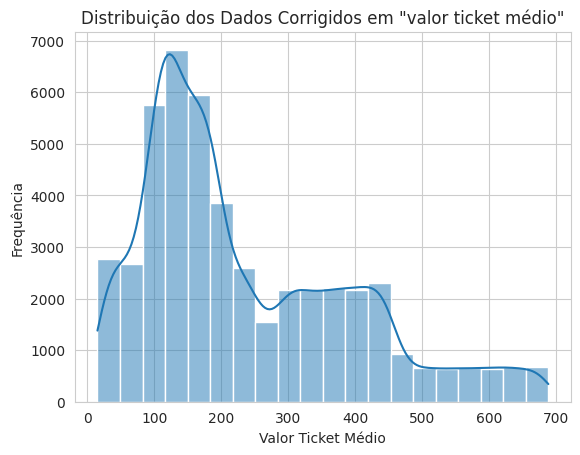

In [47]:
# Histograma dos dados corrigidos

sns.histplot(dados_sem_outliers_ticket_medio['valor ticket médio'], bins=20, kde=True)
plt.title('Distribuição dos Dados Corrigidos em "valor ticket médio"')
plt.xlabel('Valor Ticket Médio')
plt.ylabel('Frequência')
plt.show()

Acima realizamos o tratamento dos dados da coluna ticket medio. De forma para ficar mais clara a visualização dos dados, utilizamos o grafico de barras.

In [26]:
#consultando as Valor Ticket Médio maxima e minimas registradas na planilha com os dados corrigidos:

ticket_max_corrigido = planilha_mc_corrigida['valor ticket médio'].max()
ticket_min_corrigido = planilha_mc_corrigida['valor ticket médio'].min()
print(f"A ticket máxima é: {ticket_max_corrigido}")
print(f"A ticket mínima é: {ticket_min_corrigido}")

A ticket máxima é: 690
A ticket mínima é: 15


In [27]:
# Leitura da planilha_mc_corrigida
# filtrando as 100 primeiras linhas

planilha_mc_corrigida.head(100)

,Região País,Estado,Data,FormaPagto,Sexo Informado Cliente,Idade,valor ticket médio,numero pedido
0,Nordeste,Piauí,2023-11-17,Cartão Crédito,F,22,102,37380646
1,Sudeste,São Paulo,2023-10-13,Boleto Bancário,M,21,32,35870530
2,Sudeste,Minas Gerais,2023-12-24,Dinheiro,M,22,101,38158515
3,Sudeste,Espírito Santo,2023-12-19,Dinheiro,F,20,70,36341482
4,Sul,Paraná,2023-12-05,Cartão Débito,M,21,67,38416338
...,...,...,...,...,...,...,...,...
95,Norte,Pará,2023-12-05,Cartão Crédito,M,22,107,37880642
96,Norte,Rondônia,2023-12-31,Dinheiro,M,19,80,36694384
97,Norte,Tocantins,2023-12-30,Cartão Débito,M,34,202,37500751
98,Norte,Roraima,2023-10-17,Cartão Crédito,F,31,94,36070951


# Abaixo novamente realizando consulta das idades e valores do ticket medio, só que, da nova planilha para fim de comparação.

In [28]:
# Filtrando as idades entre 18 e 90 anos
idades_filtradas = planilha_mc_corrigida[(planilha_mc_corrigida['Idade'] >= 18) & (planilha_mc_corrigida['Idade'] <= 90)]

# Contando o número de linhas que temos de clientes entre essa idade:
qtd_idades_filtradas = idades_filtradas.shape[0]

# Exibindo o resultado
print(f"O número de linhas com idades entre 18 e 90 anos é: {qtd_idades_filtradas}")

O número de linhas com idades entre 18 e 90 anos é: 47804


In [29]:
# Verificando se há valores não numéricos na coluna 'valor ticket médio'
nao_numericos_ticket_medio = planilha_mc_corrigida['valor ticket médio'].apply(lambda x: not isinstance(x, (int, float))).sum()

if nao_numericos_ticket_medio > 0:
    print(f"Há {nao_numericos_ticket_medio} valores não numéricos na coluna 'valor ticket médio'.")
else:
    print("Todos os valores na coluna 'valor ticket médio' são numéricos.")


Todos os valores na coluna 'valor ticket médio' são numéricos.


In [30]:
# Verificando se há valores iguais a 0 ou negativos na coluna 'valor ticket médio'
valores_inconsistentes = planilha_mc_corrigida['valor ticket médio'] <= 0

# Exibindo as linhas que têm valores inconsistentes
linhas_inconsistentes = planilha_mc_corrigida[valores_inconsistentes]

if not linhas_inconsistentes.empty:
    print("Há valores iguais a 0 ou negativos na coluna 'valor ticket médio':")
    print(linhas_inconsistentes)
else:
    print("Não há valores iguais a 0 ou negativos na coluna 'valor ticket médio'.")

Não há valores iguais a 0 ou negativos na coluna 'valor ticket médio'.


In [31]:
# Calculando o ticket médio considerando todos os dados corrigido
ticket_medio_total_corrigida = planilha_mc_corrigida['valor ticket médio'].mean()
print(f"Ticket médio de vendas considerando todos os dados corrigidos: {ticket_medio_total_corrigida}")

Ticket médio de vendas considerando todos os dados corrigidos: 236.97546230440966


In [32]:
# Realizando o teste t
t_stat, p_value = stats.ttest_ind(planilha_mc_corrigida['valor ticket médio'], dados_sem_outliers_ticket_medio['valor ticket médio'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretando o p-value
alpha = 0.05
if p_value < alpha:
    print("A diferença entre as médias é estatisticamente significativa.")
else:
    print("A diferença entre as médias não é estatisticamente significativa.")

T-statistic: 0.4463408236611628
P-value: 0.6553520830081261
A diferença entre as médias não é estatisticamente significativa.


Acima podemos observar que novamente não há diferença entre as medias e que não são estatisticamente significativas.
Porém, podemos a diferença dos valores com o anterior. Após o tratamento e analise dos dados, podemos afirmar que os dados estão fidedignos para apresentar para os gerentes da melhores compras.

# **Continuando nas analises e buscando auxiliar a area comercial para identificar o perfil dos clientes**

In [33]:
# Criando as faixas etárias
faixas_etarias = {
    '18-24': (18, 24),
    '25-34': (25, 34),
    '35-44': (35, 44),
    '45-54': (45, 54),
    '55-64': (55, 64),
    '65+': (65, 100)
}

# Criando a coluna 'Faixa Etária' no DataFrame
planilha_mc_corrigida.loc[:, 'Faixa Etária'] = pd.cut(planilha_mc_corrigida['Idade'],
                                                      bins=[faixas_etarias[faixa][0] - 0.1 for faixa in faixas_etarias.keys()] + [faixas_etarias['65+'][1] + 0.1],
                                                      labels=faixas_etarias.keys())

# Calculando a média do valor ticket médio por faixa etária
media_ticket_faixa_etaria = planilha_mc_corrigida.groupby('Faixa Etária')['valor ticket médio'].mean().reset_index()

# Exibindo a tabela de médias
print(media_ticket_faixa_etaria)



  Faixa Etária  valor ticket médio
0        18-24           67.514137
1        25-34          170.556666
2        35-44          356.403997
3        45-54          490.231832
4        55-64          153.301118
5          65+          107.064483


<ipython-input-34-a770f608513d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Faixa Etária', y='valor ticket médio', data=media_ticket_faixa_etaria, palette='coolwarm')


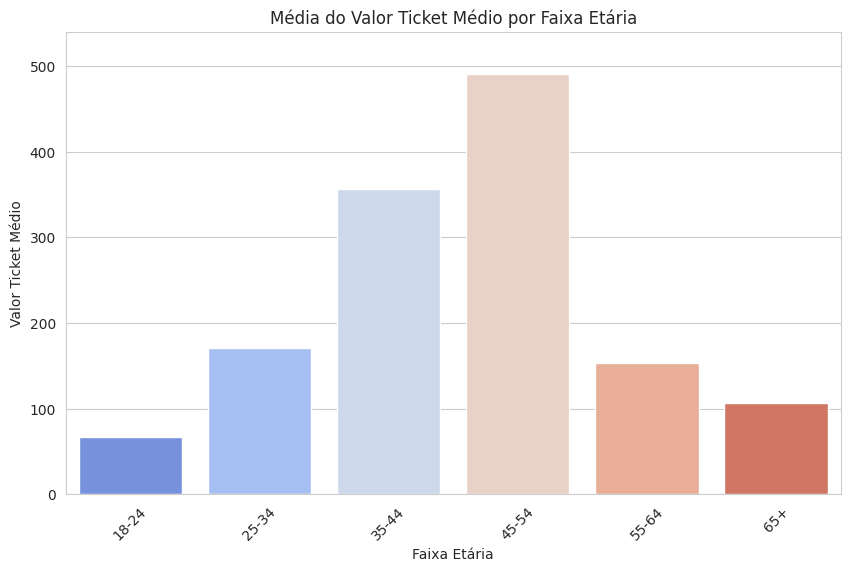

In [34]:
# Estilo do gráfico
sns.set_style("whitegrid")

# Criando o gráfico de barras com o Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Faixa Etária', y='valor ticket médio', data=media_ticket_faixa_etaria, palette='coolwarm')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor Ticket Médio')
plt.title('Média do Valor Ticket Médio por Faixa Etária')
plt.xticks(rotation=45)
plt.ylim(0, media_ticket_faixa_etaria['valor ticket médio'].max() * 1.1)  # Ajustando o limite do eixo Y
plt.show()

In [35]:
# Calculando a idade média dos clientes selecionados
idade_media = planilha_mc_corrigida['Idade'].mean()

# Calculando a variância da idade
variancia_idade = planilha_mc_corrigida['Idade'].var()

# Calculando o desvio padrão da idade
desvio_padrao_idade = planilha_mc_corrigida['Idade'].std()

# Calculando o valor médio e mediana por faixa etária
valor_medio_por_faixa = planilha_mc_corrigida.groupby('Faixa Etária')['valor ticket médio'].mean().reset_index()
mediana_por_faixa = planilha_mc_corrigida.groupby('Faixa Etária')['valor ticket médio'].median().reset_index()

# Calculando o ranking das vendas por faixa etária
ranking_vendas_por_faixa = planilha_mc_corrigida.groupby('Faixa Etária')['valor ticket médio'].sum().sort_values(ascending=False).reset_index()

# Exibindo as métricas calculadas
print("Idade Média dos Clientes Selecionados:", idade_media)
print("Variância da Idade:", variancia_idade)
print("Desvio Padrão da Idade:", desvio_padrao_idade)
print("\nValor Médio por Faixa Etária:")
print(valor_medio_por_faixa)
print("\nMediana por Faixa Etária:")
print(mediana_por_faixa)
print("\nRanking das Vendas por Faixa Etária:")
print(ranking_vendas_por_faixa)

Idade Média dos Clientes Selecionados: 39.36519956488997
Variância da Idade: 195.26938363692975
Desvio Padrão da Idade: 13.97388219633076

Valor Médio por Faixa Etária:
  Faixa Etária  valor ticket médio
0        18-24           67.514137
1        25-34          170.556666
2        35-44          356.403997
3        45-54          490.231832
4        55-64          153.301118
5          65+          107.064483

Mediana por Faixa Etária:
  Faixa Etária  valor ticket médio
0        18-24                68.0
1        25-34               170.0
2        35-44               357.0
3        45-54               490.0
4        55-64               153.0
5          65+               107.0

Ranking das Vendas por Faixa Etária:
  Faixa Etária  valor ticket médio
0        45-54             3831652
1        35-44             3370869
2        25-34             2134005
3        55-64             1316550
4        18-24              570697
5          65+              104602


<ipython-input-36-74a6c5e58984>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Faixa Etária', y='valor ticket médio', data=mediana_por_faixa, palette='summer')


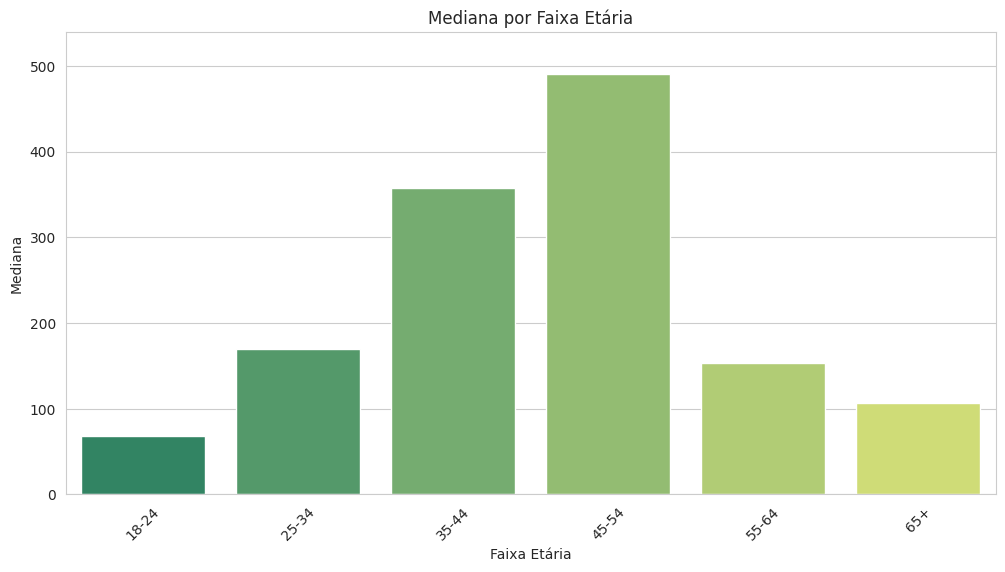

In [36]:
# Definindo o estilo do gráfico
sns.set_style("whitegrid")

# Criando o gráfico de barras com o Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Faixa Etária', y='valor ticket médio', data=mediana_por_faixa, palette='summer')
plt.xlabel('Faixa Etária')
plt.ylabel('Mediana')
plt.title('Mediana por Faixa Etária')
plt.xticks(rotation=45)
plt.ylim(0, mediana_por_faixa['valor ticket médio'].max() * 1.1)  # Ajustando o limite do eixo Y
plt.show()

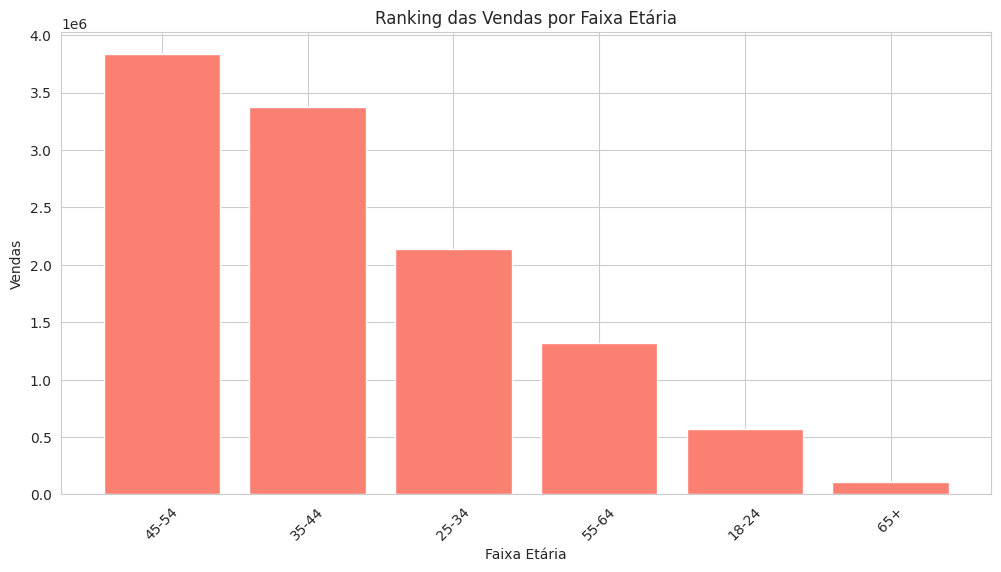

In [37]:
# Criando gráfico de barras para o ranking das vendas por faixa etária
plt.figure(figsize=(12, 6))
plt.bar(ranking_vendas_por_faixa['Faixa Etária'], ranking_vendas_por_faixa['valor ticket médio'], color='salmon')
plt.xlabel('Faixa Etária')
plt.ylabel('Vendas')
plt.title('Ranking das Vendas por Faixa Etária')
plt.xticks(rotation=45)
plt.show()

# **Outras Informações**

Calculo de valor medio ticket médio. A intenção é observar as regiões do país que mais consomem e a partir desse dado, oferecer ao comercial, marketing e direção das melhores compras.

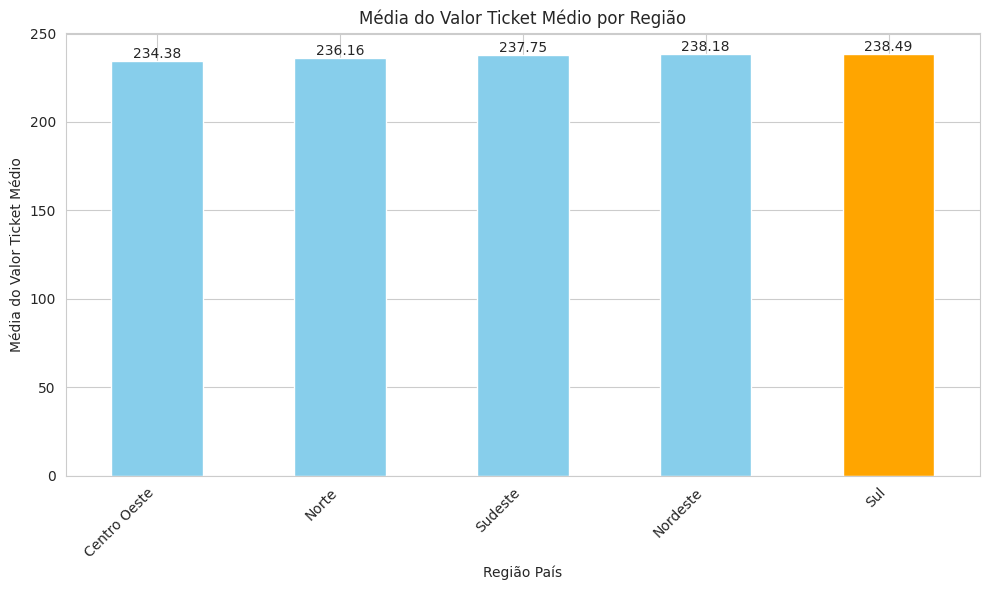

In [38]:
# Calculando a média dos valores do ticket médio por região
media_ticket_por_regiao = planilha_mc_corrigida.groupby('Região País')['valor ticket médio'].mean()

# Deixando em ordem as regiões por valor médio do ticket
media_ticket_por_regiao = media_ticket_por_regiao.sort_values()

# Identificando o índice da região com maior média
indice_maior_media = media_ticket_por_regiao.idxmax()

# Criando o gráfico de barras destacando a maior média
plt.figure(figsize=(10, 6))
grafico = media_ticket_por_regiao.plot(kind='bar', color=['skyblue' if index != indice_maior_media else 'orange' for index in media_ticket_por_regiao.index])
plt.title('Média do Valor Ticket Médio por Região')
plt.xlabel('Região País')
plt.ylabel('Média do Valor Ticket Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adicionando os valores nas barras
for i, v in enumerate(media_ticket_por_regiao):
    plt.annotate(str(round(v, 2)), (i, v), ha='center', va='bottom')

plt.show()



# Obervação do sexo informado dos nossos clientes.

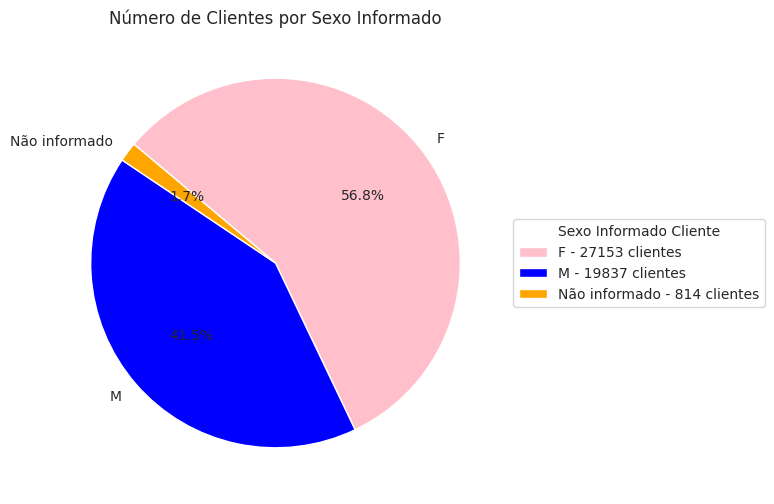

In [39]:
# Contando o número de clientes por 'Sexo Informado Cliente'
sexo_informado = planilha_mc_corrigida['Sexo Informado Cliente'].value_counts()

# Criando o gráfico de pizza
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(sexo_informado, labels=sexo_informado.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'blue', 'orange'], counterclock=False)

# Adicionando uma legenda com o número de clientes e as cores
legend_labels = [f'{label} - {value} clientes' for label, value in zip(sexo_informado.index, sexo_informado)]
ax.legend(wedges, legend_labels, title='Sexo Informado Cliente', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Número de Clientes por Sexo Informado')
plt.show()

# **Pedidos duplicados**

In [40]:
# criando script para consulta de pedidos duplicado:
# importante consultar com a area financeira e logistica se interfere e se deveria ser um nº unico

duplicacao_pedido = planilha_mc_corrigida.duplicated('numero pedido').sum()
print(f"Número de duplicatas de pedidos: {duplicacao_pedido}")

Número de duplicatas de pedidos: 373


Acima temos os numeros de pedidos duplicados, podem ser uma inconsistente.

In [41]:
planilha_mc_corrigida['valor ticket médio'].describe()

count    47804.000000
mean       236.975462
std        157.843656
min         15.000000
25%        118.000000
50%        183.000000
75%        346.000000
max        690.000000
Name: valor ticket médio, dtype: float64

Acima vemos os números são estatísticas descritivas para a variável "valor ticket médio" de um conjunto de dados. Aqui está o que cada um significa:

count: O número total de observações na variável. Neste caso, há 47.804 observações.
mean: A média da variável, que é calculada somando todos os valores e dividindo pelo número de observações. A média do "valor ticket médio" é de aproximadamente 236,98.
std: O desvio padrão, que mede a dispersão dos valores em torno da média. Um desvio padrão maior indica maior dispersão dos valores em relação à média. Neste caso, o desvio padrão é aproximadamente 157,84.
min: O valor mínimo da variável, que é 15 neste conjunto de dados.
25%: O primeiro quartil, que indica o valor abaixo do qual 25% dos dados estão. Neste caso, o primeiro quartil é 118.
50%: O segundo quartil, que é a mediana, indicando o valor abaixo do qual 50% dos dados estão. Neste caso, a mediana é 183.
75%: O terceiro quartil, indicando o valor abaixo do qual 75% dos dados estão. Neste caso, o terceiro quartil é 346.
max: O valor máximo da variável, que é 690 neste conjunto de dados.
Essas estatísticas são úteis para entender a distribuição da variável "valor ticket médio", incluindo sua tendência central (média), dispersão (desvio padrão) e os valores mínimos, máximos e quartis que dividem os dados em partes iguais.

In [42]:
idade_correlacao = planilha_mc_corrigida
correlacao = idade_correlacao['valor ticket médio'].corr(idade_correlacao['Idade'])
idade_correlacao['valor ticket médio'].corr(idade_correlacao['Idade'])

0.3484585547111574

Assim temos resultado da correlação entre as colunas 'valor ticket médio' e 'Idade' da sua planilha (0.3484585547111574) indica uma correlação positiva fraca entre essas duas variáveis.

Isso significa que, à medida que a idade aumenta, o valor médio do ticket tende a aumentar ligeiramente. No entanto, a correlação não é muito forte, sugerindo que outros fatores também influenciam o valor médio do ticket, além da idade.